In [86]:
!pip install 'pymc3 ==3.8'
!pip install 'arviz ==0.8.3'

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import arviz as az
import pymc3 as pm
sns.set()
plt.style.use('fivethirtyeight')

### Code 7.1

In [88]:
url = 'https://raw.githubusercontent.com/pymc-devs/resources/master/Rethinking/Data/rugged.csv'
d = pd.read_csv(url,sep=';', header=0)
d.head()

,isocode,isonum,country,rugged,rugged_popw,rugged_slope,rugged_lsd,rugged_pc,land_area,lat,lon,soil,desert,tropical,dist_coast,near_coast,gemstones,rgdppc_2000,rgdppc_1950_m,rgdppc_1975_m,rgdppc_2000_m,rgdppc_1950_2000_m,q_rule_law,cont_africa,cont_asia,cont_europe,cont_oceania,cont_north_america,cont_south_america,legor_gbr,legor_fra,legor_soc,legor_deu,legor_sca,colony_esp,colony_gbr,colony_fra,colony_prt,colony_oeu,africa_region_n,africa_region_s,africa_region_w,africa_region_e,africa_region_c,slave_exports,dist_slavemkt_atlantic,dist_slavemkt_indian,dist_slavemkt_saharan,dist_slavemkt_redsea,pop_1400,european_descent
0,ABW,533,Aruba,0.462,0.380,1.226,0.144,0.000,18.0,12.508,-69.970,21.324,0.000,100.000,0.001,100.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,614.0,NaN
1,AFG,4,Afghanistan,2.518,1.469,7.414,0.720,39.004,65209.0,33.833,66.026,27.849,4.356,0.000,0.922,0.0000,0,NaN,644.756,720.633,565.231,679.791,-1.687,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,1870829.0,0.0
2,AGO,24,Angola,0.858,0.714,2.274,0.228,4.906,124670.0,-12.299,17.551,26.676,0.425,44.346,0.428,13.1587,47756,1794.729,1051.822,1073.036,765.215,1106.763,-1.567,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,3610000.0,5.669,6.981,4.926,3.872,1223208.0,2.0
3,AIA,660,Anguilla,0.013,0.010,0.026,0.006,0.000,9.0,18.231,-63.064,100.000,0.000,100.000,0.000,100.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,8,Albania,3.427,1.597,10.451,1.006,62.133,2740.0,41.143,20.070,68.088,0.000,0.000,0.048,94.6919,0,3703.113,1001.339,2289.472,2741.420,1931.784,-0.820,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,200000.0,100.0


In [89]:
d['log_gdp'] = np.log(d.rgdppc_2000)
dd = d[~d.rgdppc_2000.isna()]
#sum(d.rgdppc_2000.isna())
d_A1 = dd[dd.cont_africa == 1]
d_A0 = dd[dd.cont_africa == 0] 

### Code 7.2

In [90]:
### Model for Africa
with pm.Model() as m7_1:
  a = pm.Normal('a',8,100)
  bR = pm.Normal('bR',0,1)
  sigma_model = pm.Uniform('sigma_model',0,10)
  mu_model = pm.Deterministic('mu_model',a + bR*d_A1.rugged )
  log_gdp = pm.Normal('log_gdp',mu = mu_model, sigma = sigma_model, observed = d_A1.log_gdp)
  trace_m7_1 = pm.sample(1000, tune = 1000)

### Model for non-Africa
with pm.Model() as m7_2:
  a = pm.Normal('a',8,100)
  bR = pm.Normal('bR',0,1)
  sigma_model = pm.Uniform('sigma_model',0,10)
  mu_model = pm.Deterministic('mu_model',a + bR*d_A0.rugged )
  log_gdp = pm.Normal('log_gdp',mu = mu_model, sigma = sigma_model, observed = d_A0.log_gdp)
  trace_m7_2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, bR, a]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 971.32it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, bR, a]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 905.81it/s]


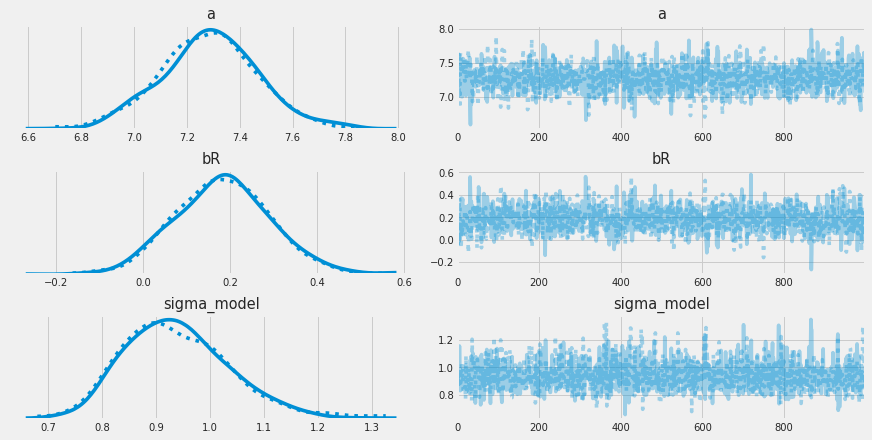

In [91]:

varnames = ['~mu_model']
pm.traceplot(trace_m7_1, varnames);

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (49). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (121). Passed array should have shape (chains, draws, *shape)
  UserWarning,


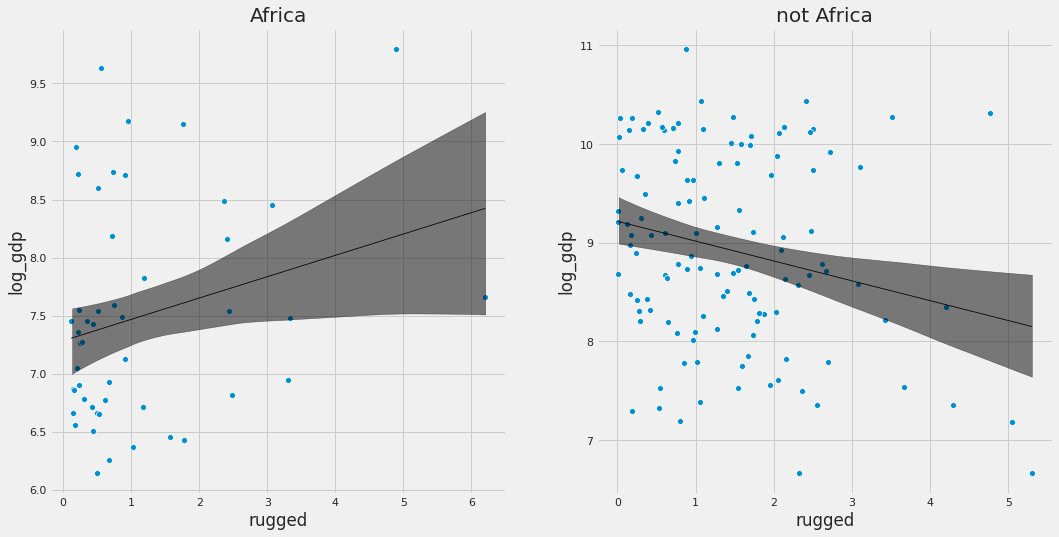

In [92]:
df_trace_m7_1 = pm.trace_to_dataframe(trace_m7_1)
df_trace_m7_2 = pm.trace_to_dataframe(trace_m7_2) 
fig,axs = plt.subplots(1,2, figsize = (16,8))
sns.scatterplot(d_A1.rugged, d_A1.log_gdp , ax= axs[0])
sns.scatterplot(d_A0.rugged, d_A0.log_gdp , ax= axs[1])
sns.lineplot(d_A1.rugged,np.array(df_trace_m7_1.filter(regex= 'mu_model*')).mean(axis=0), ax= axs[0], color = 'black', linewidth = 0.8)
az.plot_hdi(d_A1.rugged,np.array(df_trace_m7_1.filter(regex= 'mu_model*')), color = 'black', hdi_prob= 0.89,ax= axs[0])

sns.lineplot(d_A0.rugged,np.array(df_trace_m7_2.filter(regex= 'mu_model*')).mean(axis=0), ax= axs[1], color = 'black', linewidth = 0.8)
az.plot_hdi(d_A0.rugged,np.array(df_trace_m7_2.filter(regex= 'mu_model*')), color = 'black', hdi_prob= 0.89,ax= axs[1])
axs[0].set_title('Africa')
axs[1].set_title('not Africa')
fig.show()

### Code 7.3

In [93]:

with pm.Model() as m7_3:
  a = pm.Normal('a',8,100)
  bR = pm.Normal('bR',0,1)
  sigma_model = pm.Uniform('sigma_model',0,10)
  mu_model = pm.Deterministic('mu_model',a + bR*dd.rugged )
  log_gdp = pm.Normal('log_gdp',mu = mu_model, sigma = sigma_model, observed = dd.log_gdp)
  trace_m7_3 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, bR, a]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 898.48it/s]


### Code 7.4

In [94]:
with pm.Model() as m7_4:
  a = pm.Normal('a',8,100)
  bR = pm.Normal('bR',0,1)
  bA = pm.Normal('bA',0,1)
  sigma_model = pm.Uniform('sigma_model',0,10)
  mu_model = pm.Deterministic('mu_model',a + bR*dd.rugged + bA*dd.cont_africa)
  log_gdp = pm.Normal('log_gdp',mu = mu_model, sigma = sigma_model, observed = dd.log_gdp)
  trace_m7_4 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, bA, bR, a]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 708.54it/s]


### Code 7.5

In [95]:
compare_df = az.compare({'m7_3' : trace_m7_3,
                         'm7_4' : trace_m7_4
                         }, method='pseudo-BMA',ic="WAIC",scale = 'deviance')
compare_df

/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:1411: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m7_4,0,476.56,4.38303,0,1,14.755,0,True,deviance
m7_3,1,539.783,2.73305,63.2227,1.86793e-14,12.9091,14.4815,False,deviance


In [96]:
df_trace_m7_3 = pm.trace_to_dataframe(trace_m7_3)
df_trace_m7_4 = pm.trace_to_dataframe(trace_m7_4)
# fig,axs = plt.subplots(1,1, figsize = (16,8))
# sns.scatterplot(d_A1.rugged, d_A1.log_gdp , ax= axs[0])
# sns.scatterplot(d_A0.rugged, d_A0.log_gdp , ax= axs[1])
# sns.lineplot(d_A1.rugged,np.array(df_trace_m7_1.filter(regex= 'mu_model*')).mean(axis=0), ax= axs[0], color = 'black', linewidth = 0.8)
# az.plot_hdi(d_A1.rugged,np.array(df_trace_m7_1.filter(regex= 'mu_model*')), color = 'black', hdi_prob= 0.89,ax= axs[0])

# sns.lineplot(d_A0.rugged,np.array(df_trace_m7_2.filter(regex= 'mu_model*')).mean(axis=0), ax= axs[1], color = 'black', linewidth = 0.8)
# az.plot_hdi(d_A0.rugged,np.array(df_trace_m7_2.filter(regex= 'mu_model*')), color = 'black', hdi_prob= 0.89,ax= axs[1])
# axs[0].set_title('Africa')
# axs[1].set_title('not Africa')
# fig.show()
df_trace_m7_4.head()

,a,bR,bA,sigma_model,mu_model__0,mu_model__1,mu_model__2,mu_model__3,mu_model__4,mu_model__5,mu_model__6,mu_model__7,mu_model__8,mu_model__9,mu_model__10,mu_model__11,mu_model__12,mu_model__13,mu_model__14,mu_model__15,mu_model__16,mu_model__17,mu_model__18,mu_model__19,mu_model__20,mu_model__21,mu_model__22,mu_model__23,mu_model__24,mu_model__25,mu_model__26,mu_model__27,mu_model__28,mu_model__29,mu_model__30,mu_model__31,mu_model__32,mu_model__33,mu_model__34,mu_model__35,...,mu_model__130,mu_model__131,mu_model__132,mu_model__133,mu_model__134,mu_model__135,mu_model__136,mu_model__137,mu_model__138,mu_model__139,mu_model__140,mu_model__141,mu_model__142,mu_model__143,mu_model__144,mu_model__145,mu_model__146,mu_model__147,mu_model__148,mu_model__149,mu_model__150,mu_model__151,mu_model__152,mu_model__153,mu_model__154,mu_model__155,mu_model__156,mu_model__157,mu_model__158,mu_model__159,mu_model__160,mu_model__161,mu_model__162,mu_model__163,mu_model__164,mu_model__165,mu_model__166,mu_model__167,mu_model__168,mu_model__169
0,9.063935,-0.044012,-1.428074,1.080657,7.598098,8.913105,9.030089,9.029825,8.945630,9.063671,9.057641,8.909320,8.990346,7.557519,9.046858,7.629655,7.625474,9.055749,8.998841,9.053768,9.061514,8.962222,9.056717,9.037219,9.026392,9.053372,9.021551,7.627894,7.627190,9.029825,8.854392,8.954740,8.981280,7.626002,7.613194,7.616363,7.629171,9.024984,7.489388,7.531684,...,9.008171,9.022563,7.490224,9.023708,7.616407,7.625122,9.063231,8.996156,7.613943,8.986913,8.995276,8.954080,9.032466,7.501051,7.420861,9.030662,7.617420,7.623537,9.017678,8.830626,9.051435,9.029913,9.037395,7.603908,8.948623,7.606064,7.595677,9.045626,9.044789,9.016710,9.040784,8.928773,9.036031,8.973534,8.987838,8.990126,8.961694,7.558355,7.612402,7.583310
1,9.163753,-0.149925,-1.395125,0.908140,7.639993,8.649960,9.048461,9.047561,8.760755,9.162854,9.142314,8.637067,8.913079,7.501762,9.105582,7.747489,7.733246,9.135867,8.942014,9.129121,9.155507,8.817277,9.139166,9.072749,9.035867,9.127771,9.019376,7.741492,7.739093,9.047561,8.449960,8.791789,8.882194,7.735045,7.691417,7.702212,7.745840,9.031070,7.269678,7.413756,...,8.973798,9.022824,7.272527,9.026722,7.702362,7.732047,9.161355,8.932869,7.693966,8.901385,8.929870,8.789540,9.056557,7.309408,7.036245,9.050410,7.705810,7.726650,9.006182,8.369001,9.121175,9.047861,9.073349,7.659783,8.770950,7.667129,7.631747,9.101385,9.098536,9.002884,9.084893,8.703334,9.068701,8.855807,8.904533,8.912329,8.815477,7.504611,7.688719,7.589618
2,9.157168,-0.135427,-1.504335,0.930114,7.536637,8.693060,9.053025,9.052212,8.793141,9.156356,9.137802,8.681413,8.930734,7.411774,9.104623,7.633738,7.620873,9.131979,8.956872,9.125885,9.149720,8.844197,9.134958,9.074964,9.041649,9.124666,9.026752,7.628321,7.626155,9.052212,8.512400,8.821174,8.902836,7.622498,7.583089,7.592840,7.632249,9.037315,7.202133,7.332278,...,8.985582,9.029867,7.204706,9.033388,7.592975,7.619790,9.155002,8.948611,7.585391,8.920171,8.945902,8.819143,9.060338,7.238021,6.991273,9.054786,7.596090,7.614914,9.014835,8.439270,9.118707,9.052483,9.075506,7.554514,8.802350,7.561150,7.529189,9.100831,9.098258,9.011855,9.085934,8.741272,9.071308,8.879001,8.923015,8.930057,8.842571,7.414347,7.580651,7.491134
3,9.041115,-0.174243,-1.472631,0.915272,7.418984,8.443985,8.907123,8.906077,8.572751,9.040070,9.016199,8.429001,8.749781,7.258332,8.973509,7.543916,7.527363,9.008706,8.783410,9.000865,9.031532,8.638440,9.012539,8.935350,8.892486,8.999297,8.873319,7.536946,7.534158,8.906077,8.211546,8.608819,8.713887,7.529454,7.478749,7.491294,7.541999,8.886910,6.988604,7.156051,...,8.820350,8.877327,6.991915,8.881857,7.491469,7.525969,9.038327,8.772781,7.481711,8.736190,8.769297,8.606205,8.916532,7.034778,6.717308,8.909388,7.495476,7.519696,8.857986,8.117455,8.991630,8.906426,8.936047,7.441984,8.584599,7.450522,7.409400,8.968630,8.965320,8.854153,8.949464,8.506016,8.930645,8.683221,8.739850,8.748910,8.636349,7.261642,7.475613,7.360438
4,9.166773,-0.130042,-1.443282,0.905738,7.611

### Code 7.6

In [97]:
rugged_seq = np.arange(-1, 9, 0.25)
# compute mu over samples
mu_pred_NotAfrica = np.zeros((len(rugged_seq), len(df_trace_m7_4['bR'])))
mu_pred_Africa = np.zeros((len(rugged_seq), len(df_trace_m7_4['bR'])))

for iSeq, seq in enumerate(rugged_seq):
    mu_pred_NotAfrica[iSeq] = df_trace_m7_4['a'] + df_trace_m7_4['bR'] * rugged_seq[iSeq] + df_trace_m7_4['bA'] * 0
    mu_pred_Africa[iSeq] = df_trace_m7_4['a'] + df_trace_m7_4['bR'] * rugged_seq[iSeq] + df_trace_m7_4['bA'] * 1

In [98]:
# summarize to means and intervals
mu_mean_NotAfrica = mu_pred_NotAfrica.mean(1)
mu_mean_Africa = mu_pred_Africa.mean(1)

/usr/local/lib/python3.6/dist-packages/arviz/utils.py:653: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (40). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/utils.py:653: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (40). Passed array should have shape (chains, draws, *shape)
  UserWarning,


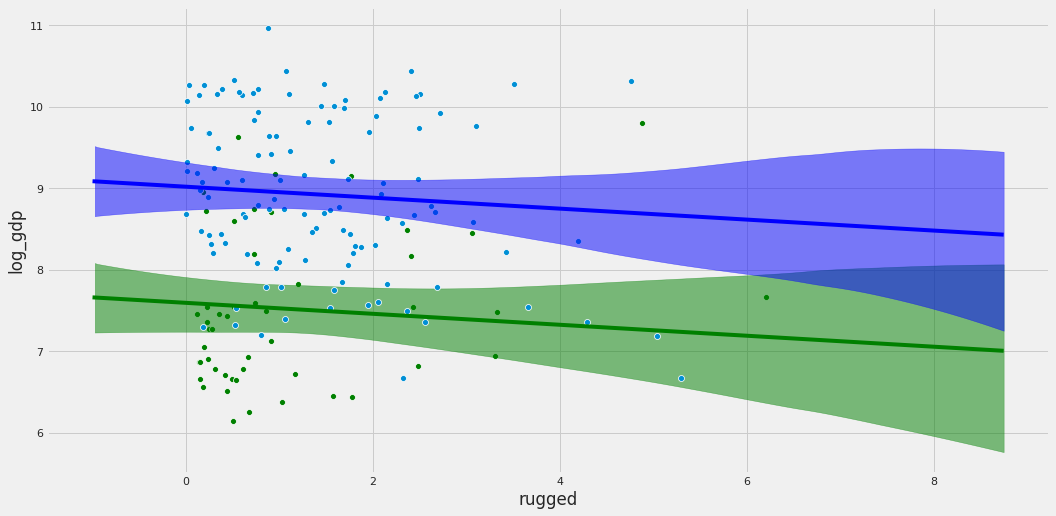

In [99]:
fig,axs = plt.subplots(1,1, figsize = (16,8))
sns.scatterplot(d_A1.rugged, d_A1.log_gdp , ax= axs, color = 'green')
sns.lineplot(rugged_seq,mu_mean_Africa,color = 'green',ax = axs)
az.plot_hdi(rugged_seq, mu_pred_Africa.T, credible_interval=0.97, color='green')
sns.scatterplot(d_A0.rugged, d_A0.log_gdp , ax= axs)
sns.lineplot(rugged_seq,mu_mean_NotAfrica,color = 'blue',ax = axs)
az.plot_hdi(rugged_seq, mu_pred_NotAfrica.T, credible_interval=0.97, color='blue')
fig.show()

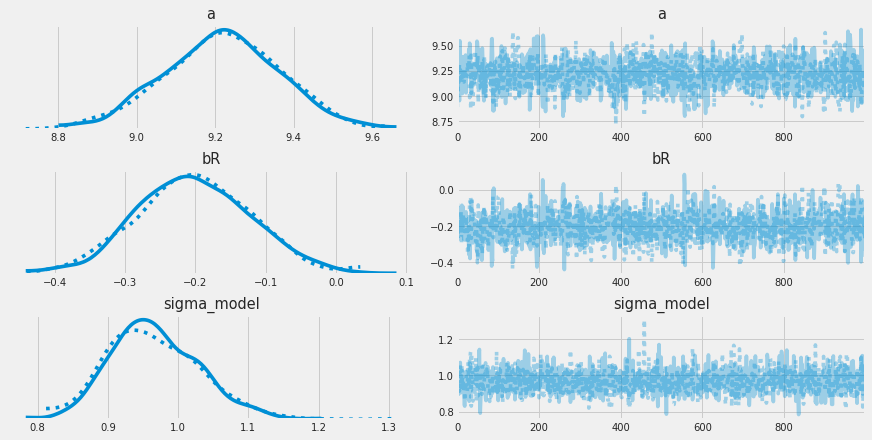

In [100]:
varnames = ['~mu_model']
pm.traceplot(trace_m7_2, varnames);

### Code 7.7

In [101]:
with pm.Model() as m7_5:
  a = pm.Normal('a',8,100)
  bR = pm.Normal('bR',0,1)
  bA = pm.Normal('bA',0,1)
  bAR = pm.Normal('bAR',0,1)
  sigma_model = pm.Uniform('sigma_model',0,10)
  gamma = pm.Deterministic('gamma', bR + bAR*dd.cont_africa)
  mu_model = pm.Deterministic('mu_model',a + gamma*dd.rugged + bA*dd.cont_africa)
  log_gdp = pm.Normal('log_gdp',mu = mu_model, sigma = sigma_model, observed = dd.log_gdp)
  trace_m7_5 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, bAR, bA, bR, a]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:03<00:00, 568.89it/s]


### Code 7.8

In [102]:
compare_df = az.compare({'m7_3' : trace_m7_3,
                         'm7_4' : trace_m7_4,
                         'm7_5': trace_m7_5
                         }, method='pseudo-BMA',ic="WAIC",scale = 'deviance')
compare_df

/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:1411: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m7_5,0,469.357,5.0431,0,0.973447,14.5423,0,True,deviance
m7_4,1,476.56,4.38303,7.20344,0.0265525,14.755,5.99833,True,deviance
m7_3,2,539.783,2.73305,70.4262,4.95982e-16,12.9091,14.5973,False,deviance


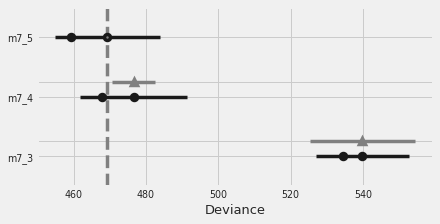

In [103]:
az.plot_compare(compare_df);

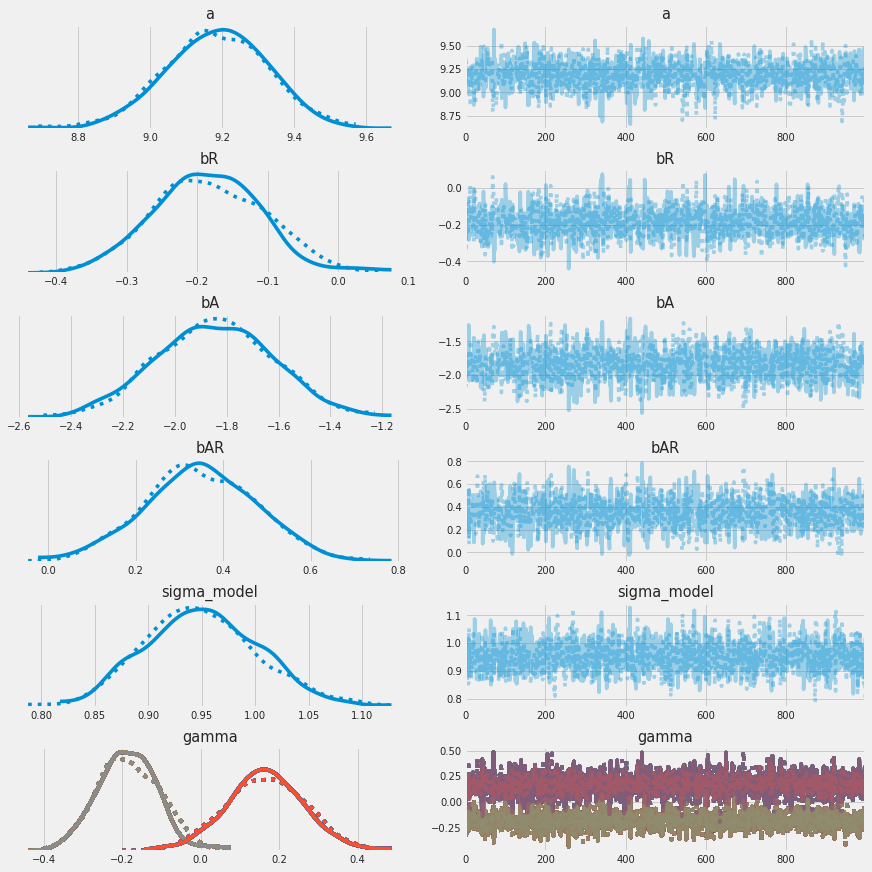

In [104]:
varnames = ['~mu_model']
pm.traceplot(trace_m7_5, varnames);

### Code 7.9

In [105]:
with pm.Model() as m7_5b:
  a = pm.Normal('a',8,100)
  bR = pm.Normal('bR',0,1)
  bA = pm.Normal('bA',0,1)
  bAR = pm.Normal('bAR',0,1)
  sigma_model = pm.Uniform('sigma_model',0,10)
  mu_model = pm.Deterministic('mu_model',a + bR*dd.rugged + bAR*dd.cont_africa * dd.rugged + bA*dd.cont_africa)
  log_gdp = pm.Normal('log_gdp',mu = mu_model, sigma = sigma_model, observed = dd.log_gdp)
  trace_m7_5b = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, bAR, bA, bR, a]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:03<00:00, 569.47it/s]


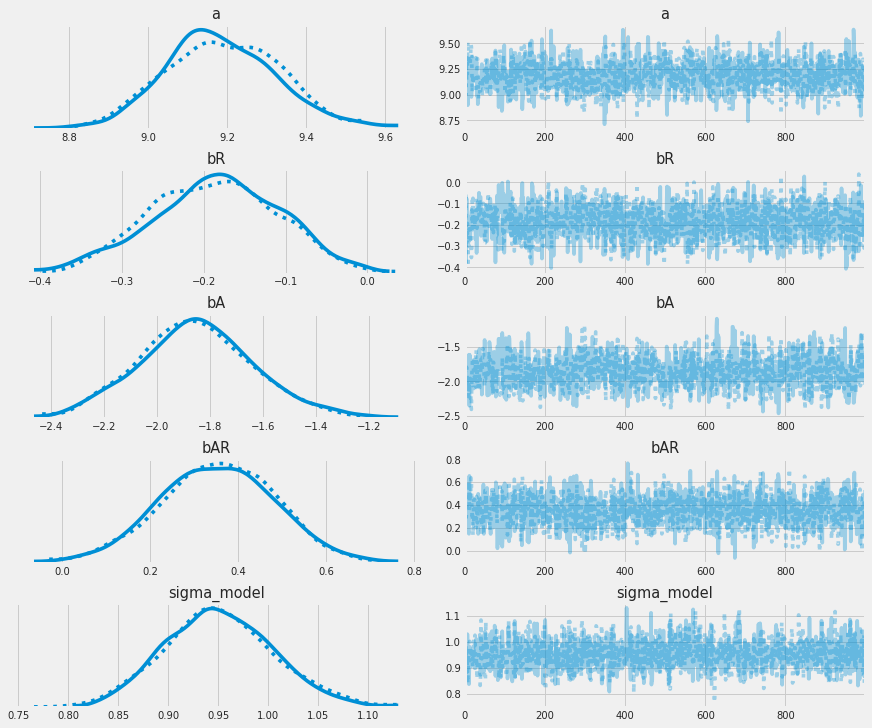

In [106]:
varnames = ['~mu_model']
pm.traceplot(trace_m7_5b, varnames);

### Code 7.10

In [107]:
rugged_seq = np.arange(-1, 9, 0.25)
ncols = trace_m7_5b['a'].shape[0]
nrows = rugged_seq.shape[0]
mu_pred_Africa = trace_m7_5b['a'] + trace_m7_5b['bR'] * np.tile(rugged_seq,(ncols,1)).T + trace_m7_5b['bAR'] * np.tile(rugged_seq,(ncols,1)).T + np.broadcast_to(trace_m7_5b['bA'],(nrows,ncols))
mu_pred_NotAfrica = trace_m7_5b['a']  + trace_m7_5b['bR'] * np.tile(rugged_seq,(ncols,1)).T


# summarize to means and intervals
mu_mean_NotAfrica = mu_pred_NotAfrica.mean(1)
mu_mean_Africa = mu_pred_Africa.mean(1)


### Code 7.11

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (40). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (40). Passed array should have shape (chains, draws, *shape)
  UserWarning,


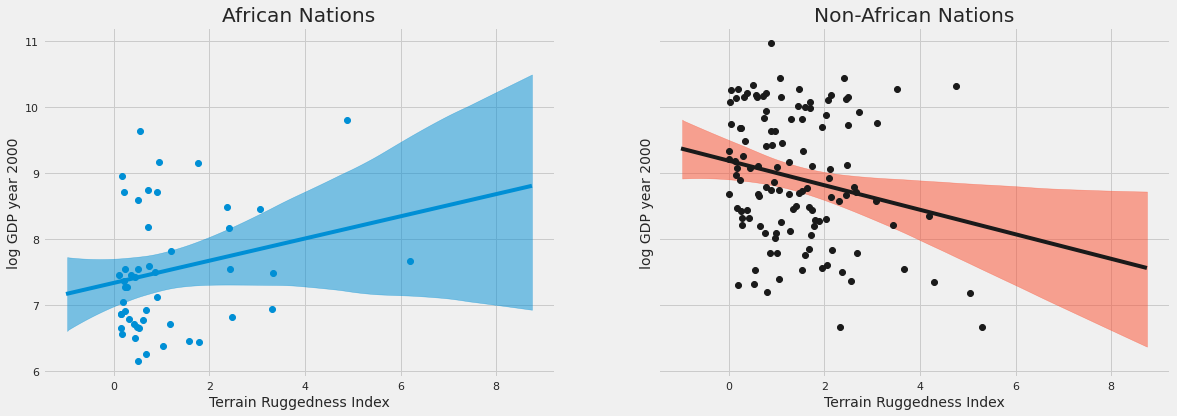

In [108]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,6))
ax1.plot(d_A1['rugged'], np.log(d_A1['rgdppc_2000']), 'C0o')
ax1.plot(rugged_seq, mu_mean_Africa, 'C0')
az.plot_hdi(rugged_seq, mu_pred_Africa.T, hdi_prob=0.97, color='C0', ax=ax1)

ax1.set_title('African Nations')
ax1.set_ylabel('log GDP year 2000', fontsize=14);
ax1.set_xlabel('Terrain Ruggedness Index', fontsize=14)
               
ax2.plot(d_A0['rugged'], np.log(d_A0['rgdppc_2000']), 'ko')
ax2.plot(rugged_seq, mu_mean_NotAfrica, 'k')
az.plot_hdi(rugged_seq, mu_pred_NotAfrica.T, hdi_prob=0.97, color='C1', ax=ax2)
ax2.set_title('Non-African Nations')
ax2.set_ylabel('log GDP year 2000', fontsize=14)
ax2.set_xlabel('Terrain Ruggedness Index', fontsize=14);

### Code 7.12

In [109]:
varnames = ['~mu_model']
az.summary(trace_m7_5b, varnames, credible_interval=.89).round(3)

/usr/local/lib/python3.6/dist-packages/arviz/utils.py:653: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,9.186,0.141,8.931,9.441,0.005,0.003,967.0,966.0,965.0,1312.0,1.0
bR,-0.186,0.077,-0.341,-0.057,0.002,0.002,1015.0,1015.0,1017.0,1238.0,1.0
bA,-1.851,0.215,-2.284,-1.470,0.007,0.005,886.0,886.0,882.0,1091.0,1.0
bAR,0.354,0.129,0.113,0.594,0.004,0.003,1040.0,1040.0,1044.0,1049.0,1.0
sigma_model,0.952,0.054,0.853,1.055,0.001,0.001,1537.0,1533.0,1534.0,1316.0,1.0


### Code 7.13

In [110]:
gamma_Africa = trace_m7_5b['bR'] + trace_m7_5b['bAR'] * 1
gamma_notAfrica = trace_m7_5b['bR']

### Code 7.14

In [111]:
print("Gamma within Africa: {:.3f}".format(gamma_Africa.mean()))
print("Gamma outside Africa: {:.3f}".format(gamma_notAfrica.mean()))

Gamma within Africa: 0.168
Gamma outside Africa: -0.186


### Code 7.15

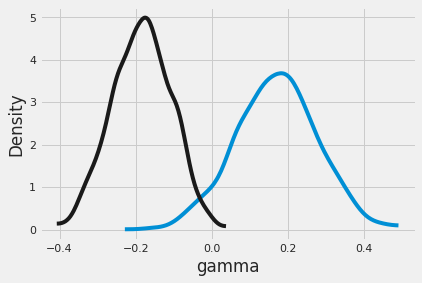

In [112]:
_, ax = plt.subplots()
ax.set_xlabel('gamma')
ax.set_ylabel('Density')
ax.set_ylim(top=5.25)
az.plot_kde(gamma_Africa)
az.plot_kde(gamma_notAfrica, plot_kwargs={'color':'k'});

### Code 7.16

In [113]:
diff = gamma_Africa - gamma_notAfrica
sum(diff < 0)/len(diff)

0.0035

### Code 7.17

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (2). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (2). Passed array should have shape (chains, draws, *shape)
  UserWarning,


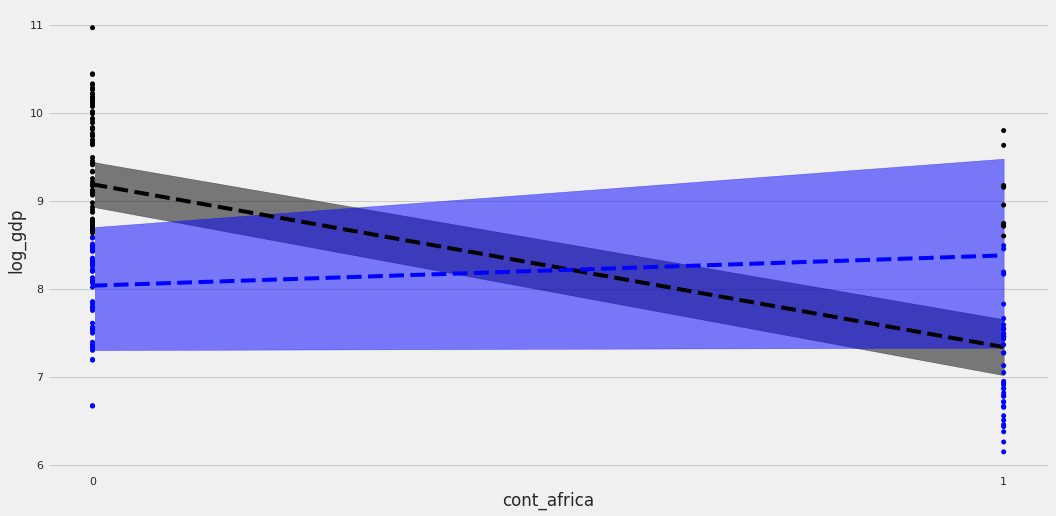

In [114]:
min_max_rugged = np.array([dd.rugged.min(),dd.rugged.max()])
ncols = trace_m7_5b['a'].shape[0]
nrows = rugged_seq.shape[0]
mu_pred_Africa = trace_m7_5b['a'] + (trace_m7_5b['bR']  + trace_m7_5b['bAR'] * 1)*np.tile(min_max_rugged,(ncols,1)).T + trace_m7_5b['bA']*1
mu_pred_not_Africa = trace_m7_5b['a'] + (trace_m7_5b['bR']  + trace_m7_5b['bAR'] * 0)*np.tile(min_max_rugged,(ncols,1)).T + trace_m7_5b['bA']*0
fig,axs = plt.subplots(1,1, figsize = (16,8))
sns.stripplot(x="cont_africa", y="log_gdp", data=dd[dd.log_gdp >= np.median(dd.log_gdp)], ax= axs,color = 'black',jitter=False)
sns.stripplot(x="cont_africa", y="log_gdp", data=dd[dd.log_gdp < np.median(dd.log_gdp)], ax= axs,color = 'blue',jitter=False)
axs.plot([0,1],  [mu_pred_not_Africa.mean(1)[0],mu_pred_Africa.mean(1)[0]], linestyle = '--',color = 'black')
az.plot_hdi([0,1],np.array([mu_pred_not_Africa[0],mu_pred_Africa[0]]).T,color = 'black')
axs.plot([0,1],  [mu_pred_not_Africa.mean(1)[1],mu_pred_Africa.mean(1)[1]], linestyle = '--',color = 'blue')
az.plot_hdi([0,1],np.array([mu_pred_not_Africa[1],mu_pred_Africa[1]]).T,color = 'blue')
fig.show()